In [22]:
!pip install pyspark

In [23]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, count, when, log1p
from pyspark.sql.types import FloatType

In [24]:
spark = SparkSession.builder \
    .appName("CrimeDataProcessing") \
    .getOrCreate()

In [25]:
# Drive A
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Step 4: Load the dataset
# Original: file_path = "/mnt/data/Crime_Data_from_2020_to_Present.csv"
#Drive T
file_path = "/content/drive/MyDrive/Spark/Crime_Data_from_2020_to_Present.csv"
from google.colab import drive
#drive.mount('/content/drive')

In [27]:
file_path = "/content/drive/MyDrive/Crime_Data_from_2020_to_Presen.csv"


In [28]:
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [29]:
# Step 5: Explore data
df.printSchema()
df.show(5)
df.describe().show()

root
 |-- DR_NO: integer (nullable = true)
 |-- Date Rptd: string (nullable = true)
 |-- DATE OCC: string (nullable = true)
 |-- TIME OCC: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- AREA NAME: string (nullable = true)
 |-- Rpt Dist No: integer (nullable = true)
 |-- Part 1-2: integer (nullable = true)
 |-- Crm Cd: integer (nullable = true)
 |-- Crm Cd Desc: string (nullable = true)
 |-- Mocodes: string (nullable = true)
 |-- Vict Age: integer (nullable = true)
 |-- Vict Sex: string (nullable = true)
 |-- Vict Descent: string (nullable = true)
 |-- Premis Cd: integer (nullable = true)
 |-- Premis Desc: string (nullable = true)
 |-- Weapon Used Cd: integer (nullable = true)
 |-- Weapon Desc: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Status Desc: string (nullable = true)
 |-- Crm Cd 1: integer (nullable = true)
 |-- Crm Cd 2: integer (nullable = true)
 |-- Crm Cd 3: integer (nullable = true)
 |-- Crm Cd 4: integer (nullable = true)
 |-- L

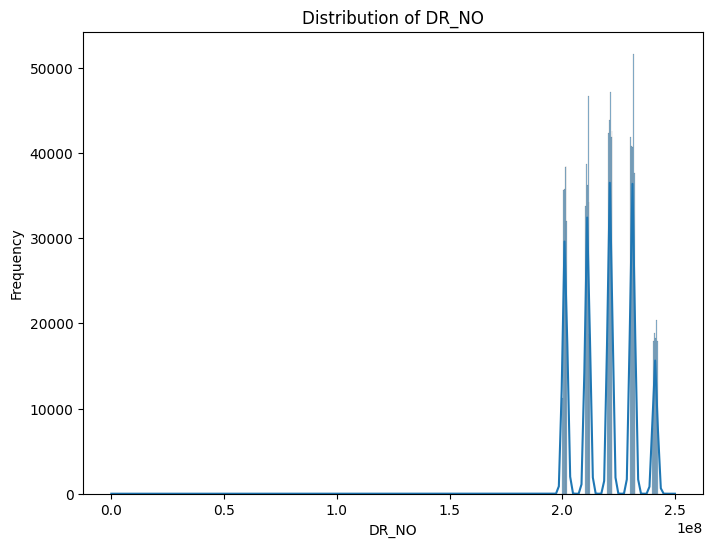

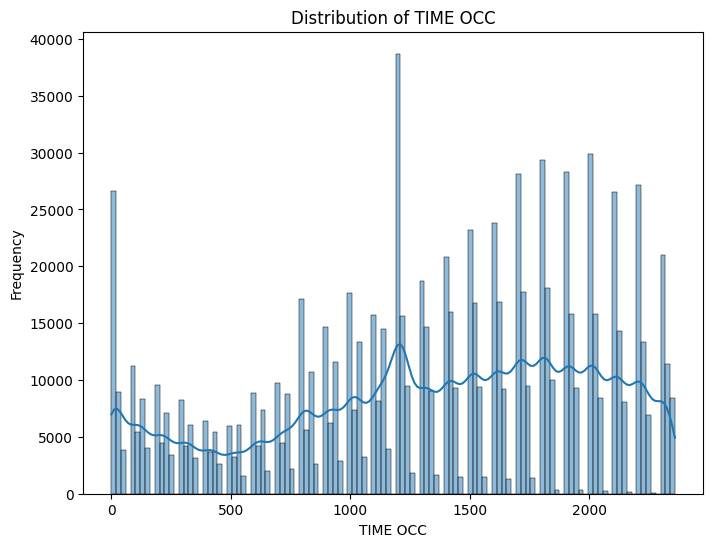

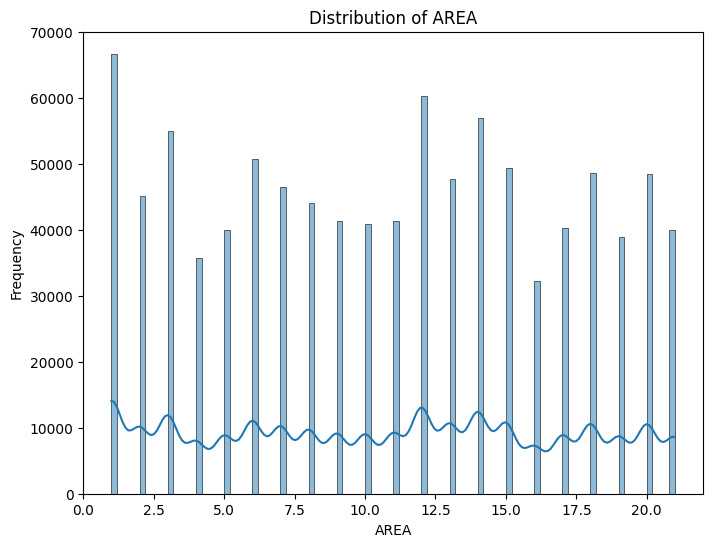

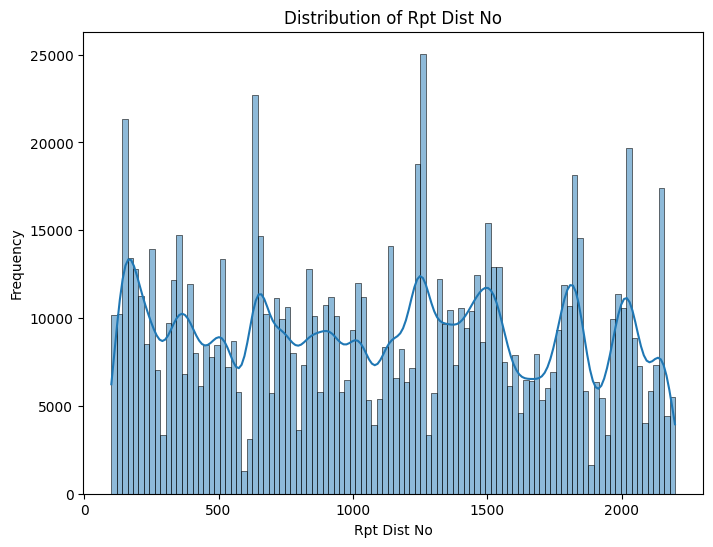

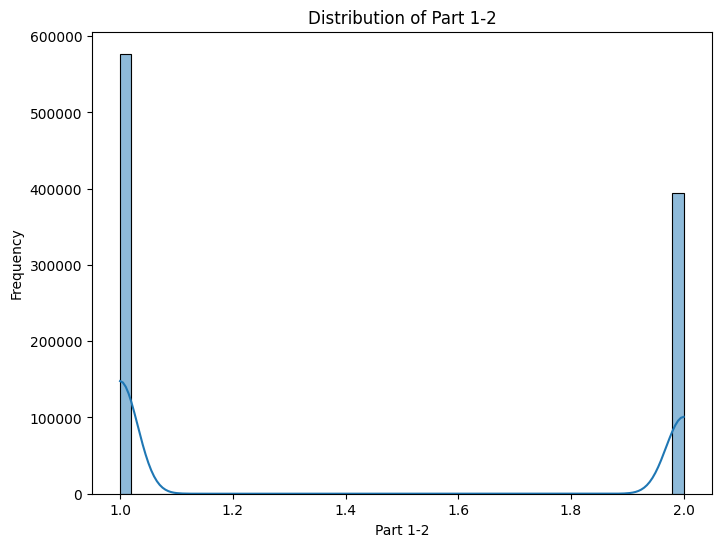

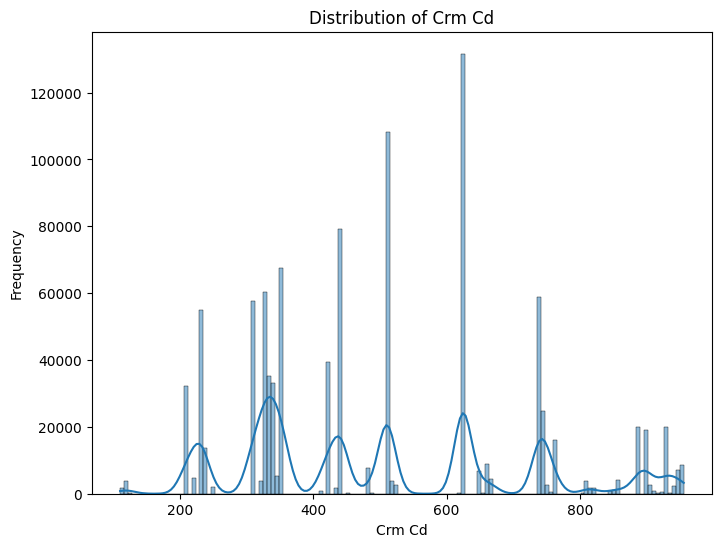

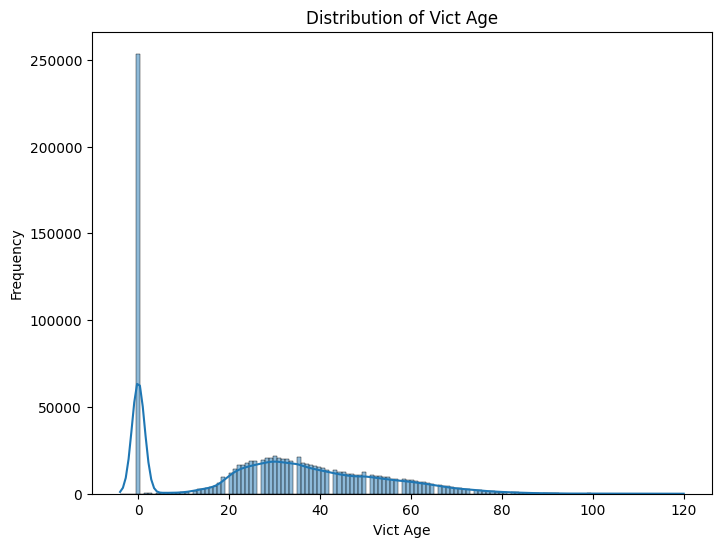

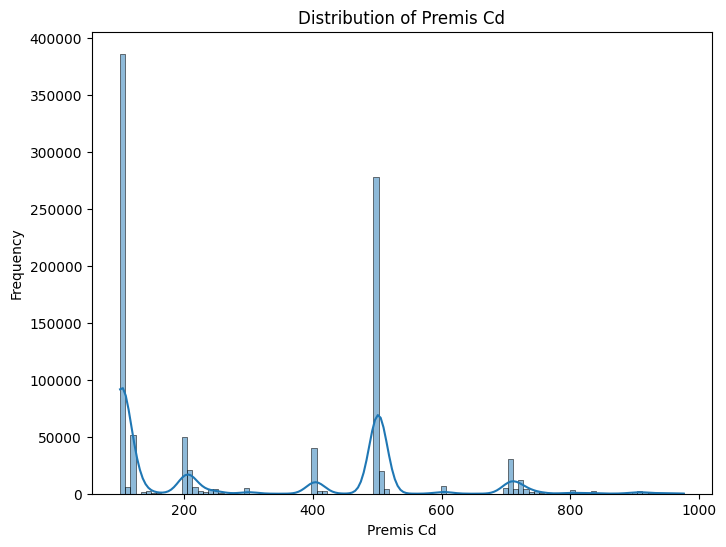

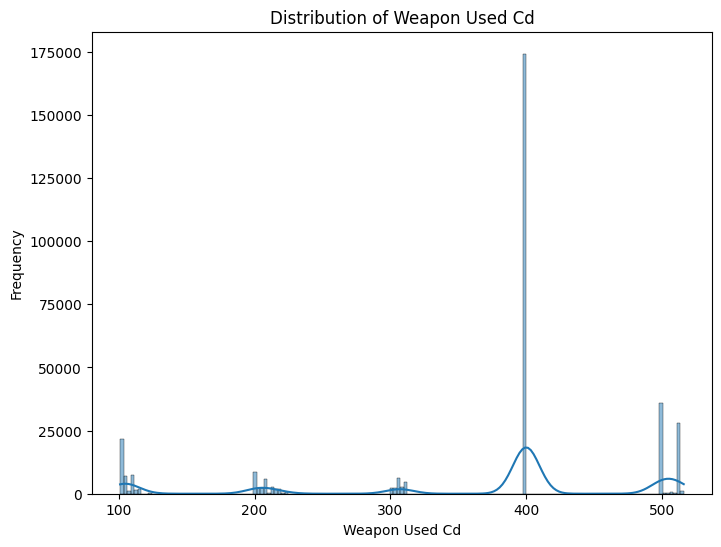

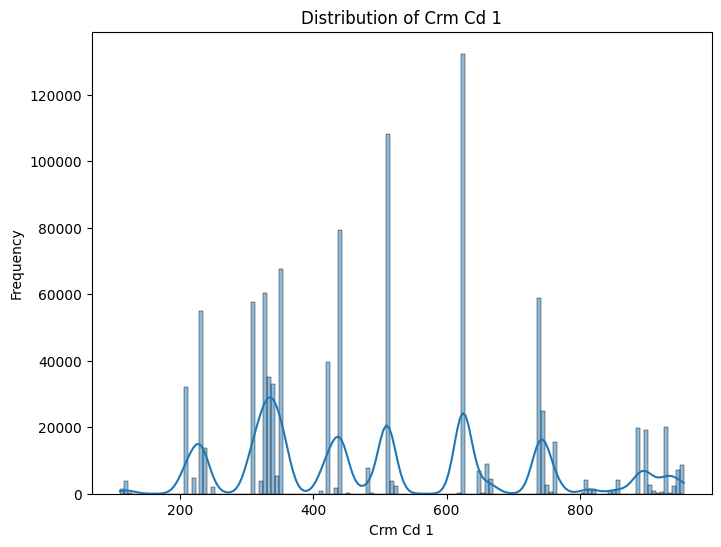

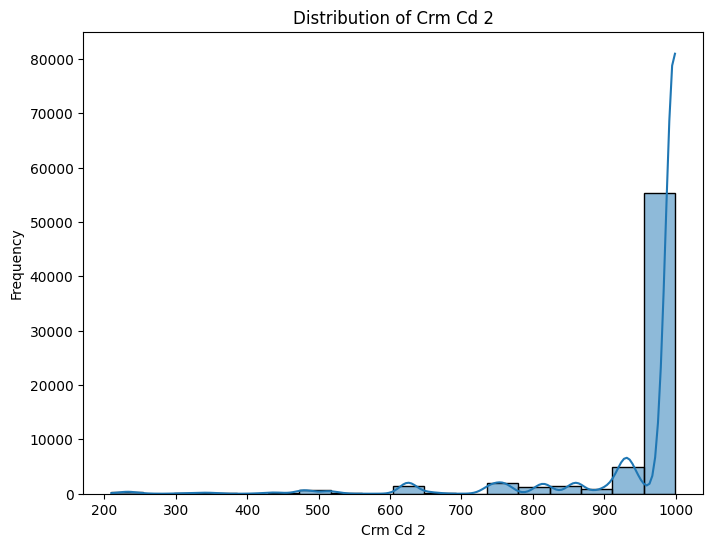

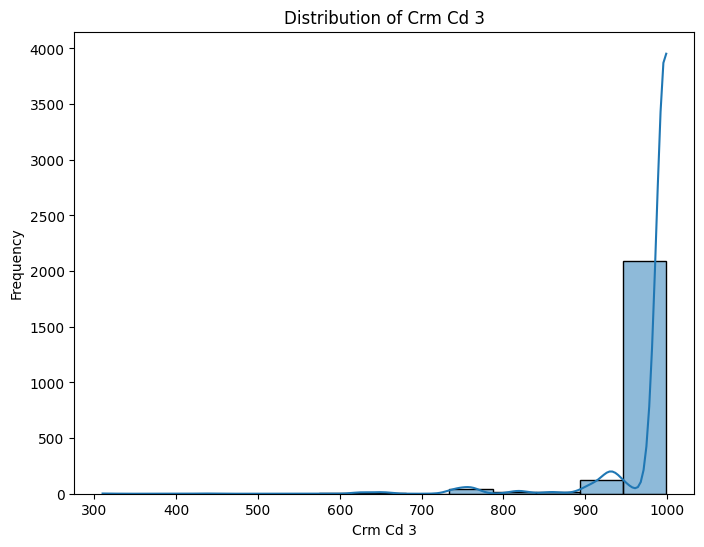

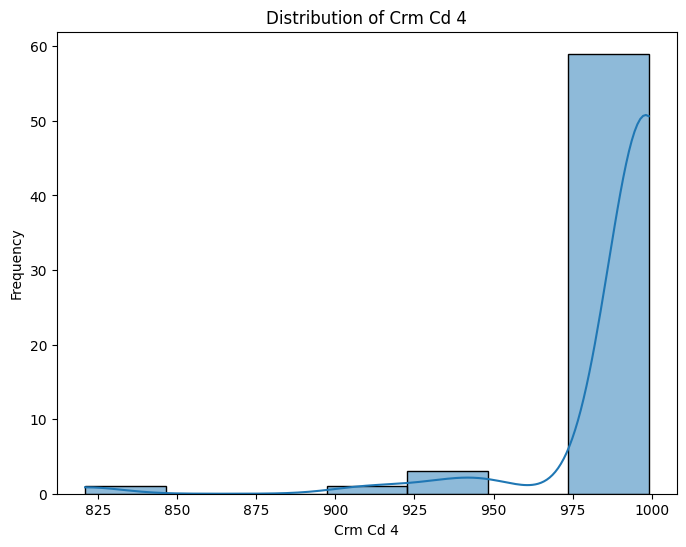

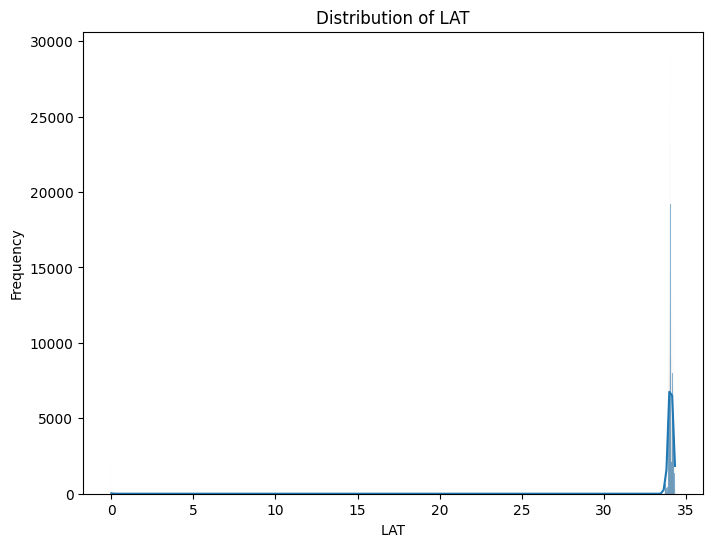

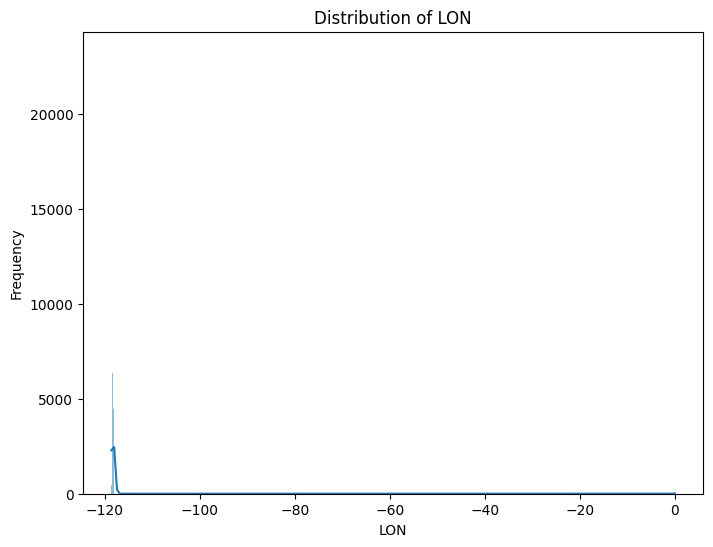

In [30]:
# prompt: distribution graphs on  all variables

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your Spark DataFrame

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Loop through numerical columns and create distribution plots
for column in pandas_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(pandas_df[column], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

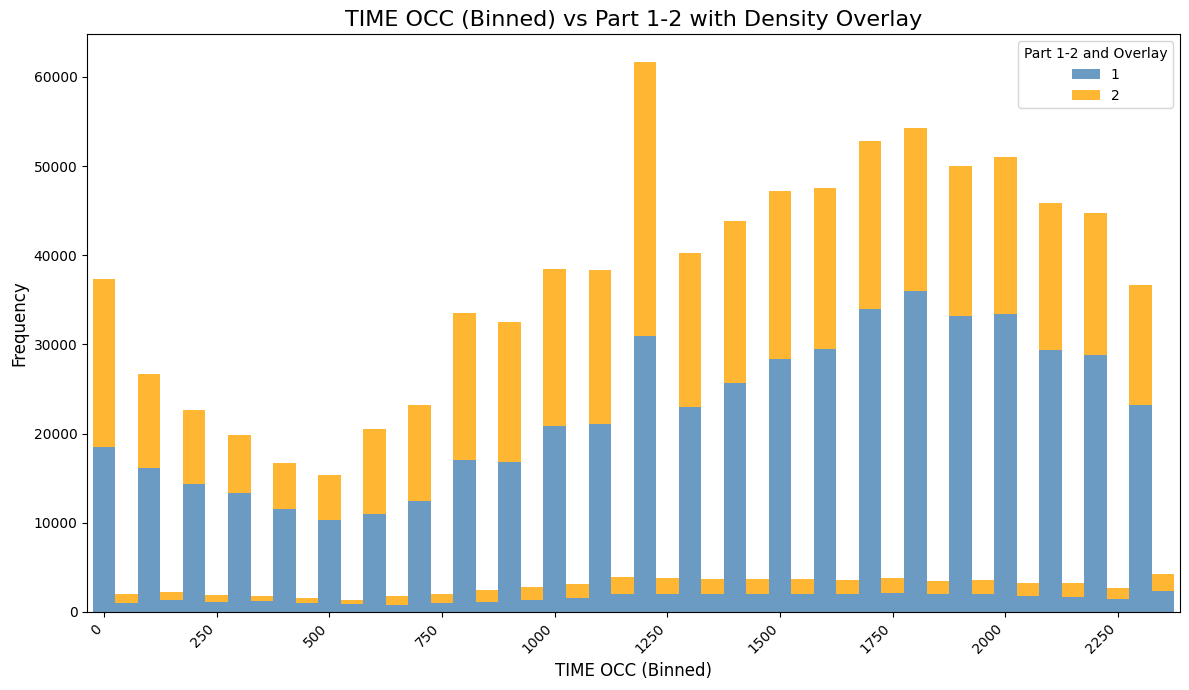

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert Spark DataFrame to Pandas DataFrame
# pandas_df = df.toPandas()

# Define bin width and create bins to match the Seaborn histogram scale
bin_width = 50  # Adjust to match the histogram's automatic binning
pandas_df['TIME OCC Bin'] = np.floor(pandas_df['TIME OCC'] / bin_width) * bin_width

# Group by binned TIME OCC and Part 1-2
grouped_data = pandas_df.groupby(['TIME OCC Bin', 'Part 1-2']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
grouped_data.plot(kind='bar', stacked=True, ax=ax, alpha=0.8, color=['steelblue', 'orange'], width=1.0)

# # Add density-like overlay
# total_counts = grouped_data.sum(axis=1)
# density_line = total_counts.rolling(window=3, min_periods=1).mean()  # Smooth the line
# ax.plot(range(len(total_counts)), density_line, color='darkblue', linewidth=2, label='Density Overlay')

# Customize x-axis to match the binning
bin_labels = grouped_data.index.astype(int)
ax.set_xticks(range(0, len(bin_labels), 5))  # Show every 5th bin
ax.set_xticklabels(bin_labels[::5], rotation=45, ha='right')

# Add titles and labels
plt.title('TIME OCC (Binned) vs Part 1-2 with Density Overlay', fontsize=16)
plt.xlabel('TIME OCC (Binned)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Part 1-2 and Overlay', fontsize=10)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


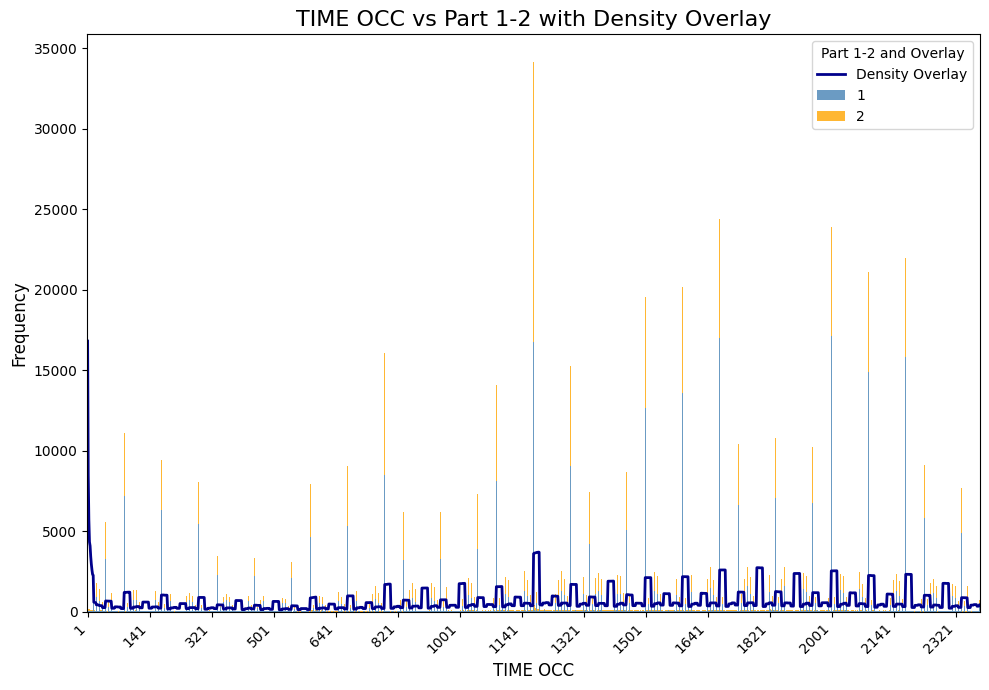

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if required columns are present
if not all(col in pandas_df.columns for col in ['TIME OCC', 'Part 1-2']):
    print("Error: 'TIME OCC' or 'Part 1-2' columns not found in the DataFrame.")
else:
    # Group data by 'TIME OCC' and 'Part 1-2'
    grouped_data = pandas_df.groupby(['TIME OCC', 'Part 1-2']).size().unstack(fill_value=0)

    # Create the stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 7))
    grouped_data.plot(kind='bar', stacked=True, ax=ax, width=1.0, alpha=0.8, color=['steelblue', 'orange'])

    # Add a density-like overlay
    total_counts = grouped_data.sum(axis=1)
    density_line = total_counts.rolling(window=10, min_periods=1).mean()  # Smoothing for trend
    ax.plot(range(len(total_counts)), density_line, color='darkblue', linestyle='-', linewidth=2, label='Density Overlay')

    # Set labels and title
    plt.title('TIME OCC vs Part 1-2 with Density Overlay', fontsize=16)
    plt.xlabel('TIME OCC', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Part 1-2 and Overlay', fontsize=10)

    # Adjust x-axis ticks to reduce clutter
    step = 100  # Adjust step size for clarity
    xticks = range(0, len(grouped_data.index), step)
    ax.set_xticks(xticks)
    ax.set_xticklabels(grouped_data.index[xticks], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


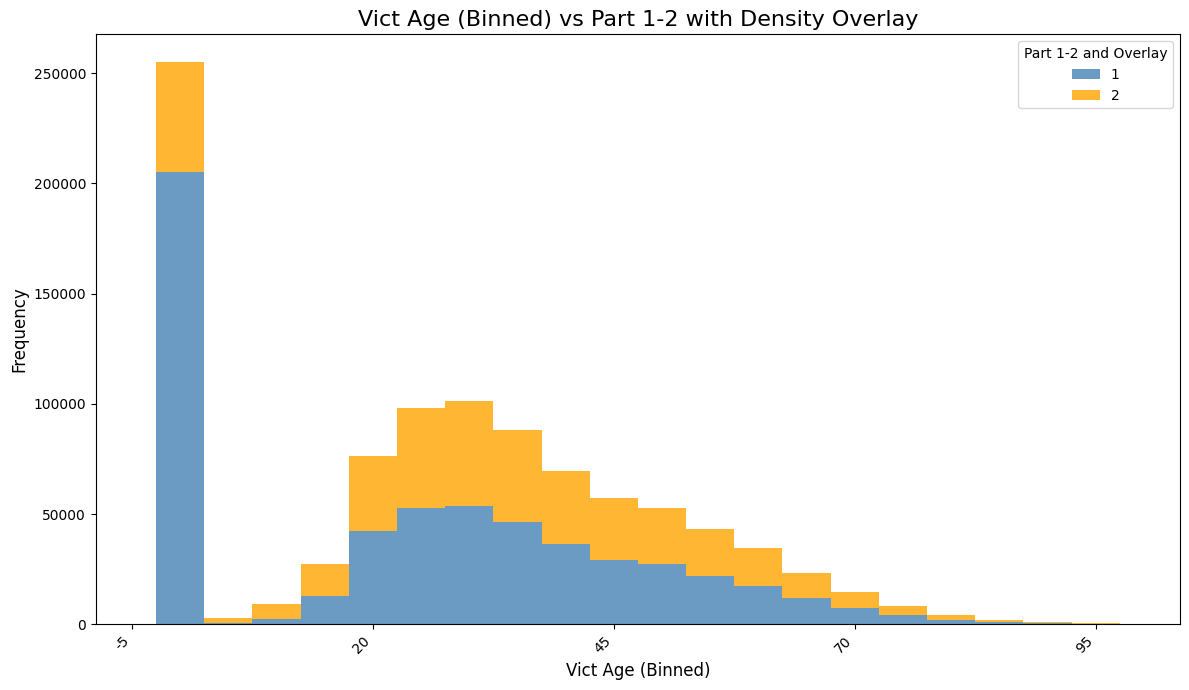

In [36]:
# Convert Spark DataFrame to Pandas DataFrame (if not already converted)

# Define bin width and create bins for Vict Age
bin_width = 5  # Adjust the bin width as per your data distribution
pandas_df['Vict Age Bin'] = np.floor(pandas_df['Vict Age'] / bin_width) * bin_width

# Group by binned Vict Age and Part 1-2
grouped_data = pandas_df.groupby(['Vict Age Bin', 'Part 1-2']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
grouped_data.plot(kind='bar', stacked=True, ax=ax, alpha=0.8, color=['steelblue', 'orange'], width=1.0)


# Customize x-axis to match the binning
bin_labels = grouped_data.index.astype(int)
ax.set_xticks(range(0, len(bin_labels), 5))  # Show every 5th bin
ax.set_xticklabels(bin_labels[::5], rotation=45, ha='right')

# Add titles and labels
plt.title('Vict Age (Binned) vs Part 1-2 with Density Overlay', fontsize=16)
plt.xlabel('Vict Age (Binned)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Part 1-2 and Overlay', fontsize=10)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

                   DR_NO  TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  \
DR_NO           1.000000 -0.005872  0.038658     0.038884 -0.023723 -0.019788   
TIME OCC       -0.005872  1.000000  0.000927     0.001040 -0.055241  0.012541   
AREA            0.038658  0.000927  1.000000     0.999049  0.007603 -0.004991   
Rpt Dist No     0.038884  0.001040  0.999049     1.000000  0.007458 -0.005094   
Part 1-2       -0.023723 -0.055241  0.007603     0.007458  1.000000  0.700396   
Crm Cd         -0.019788  0.012541 -0.004991    -0.005094  0.700396  1.000000   
Vict Age       -0.049509 -0.035144  0.021778     0.021808  0.202791 -0.017338   
Premis Cd       0.031079 -0.062610 -0.004740    -0.004913  0.275821  0.114893   
Weapon Used Cd  0.015487 -0.006022 -0.017403    -0.016892  0.427934  0.366381   
Crm Cd 1       -0.019662  0.012546 -0.005201    -0.005304  0.700882  0.999316   
Crm Cd 2        0.029387  0.007364 -0.035551    -0.035924  0.075625 -0.000269   
Crm Cd 3        0.037481 -0.

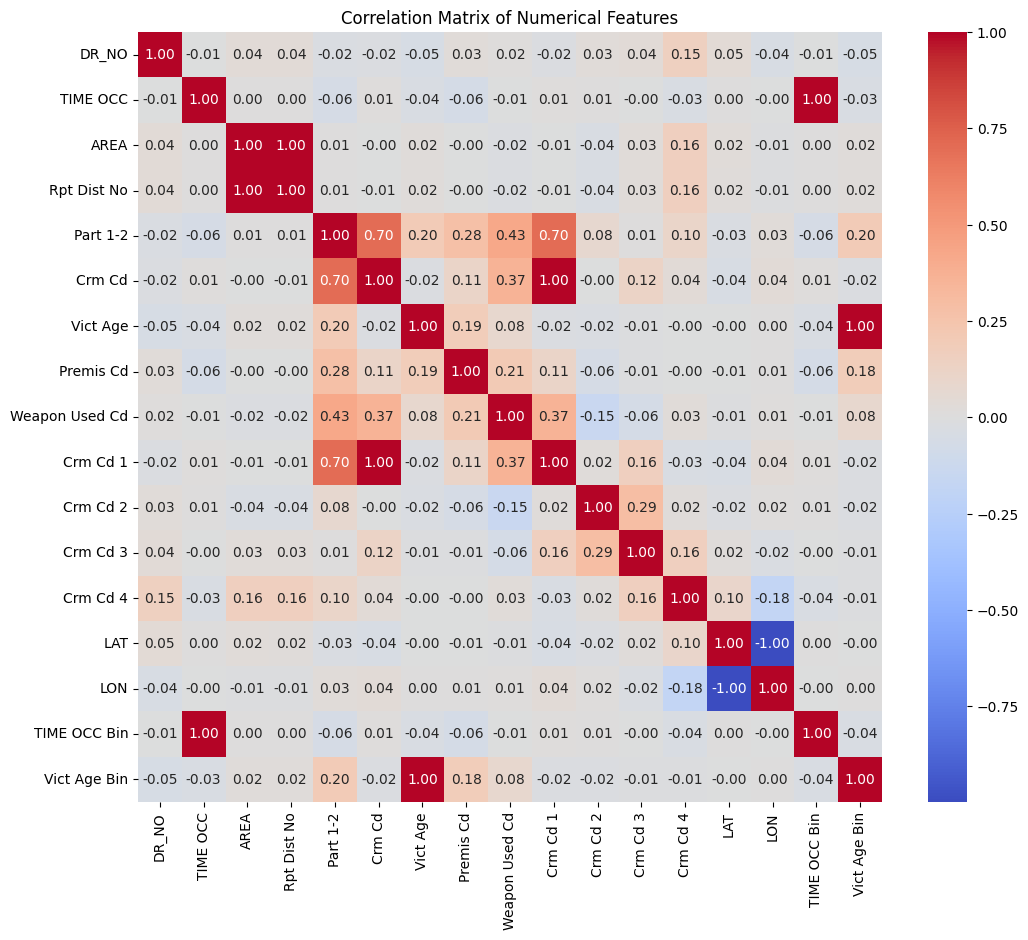

In [37]:


# Select numerical columns for correlation analysis
numerical_cols = pandas_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = pandas_df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [38]:
# prompt: most 3 types of crime commited

from pyspark.sql.functions import count

# Assuming 'df' is your Spark DataFrame
crime_counts = df.groupBy("Crm Cd Desc").count().orderBy(col("count").desc())

# Show the top 3 crime types
crime_counts.show(5)

+--------------------+------+
|         Crm Cd Desc| count|
+--------------------+------+
|    VEHICLE - STOLEN|108191|
|BATTERY - SIMPLE ...| 74629|
|BURGLARY FROM VEH...| 60431|
|   THEFT OF IDENTITY| 60051|
|VANDALISM - FELON...| 58926|
+--------------------+------+
only showing top 5 rows



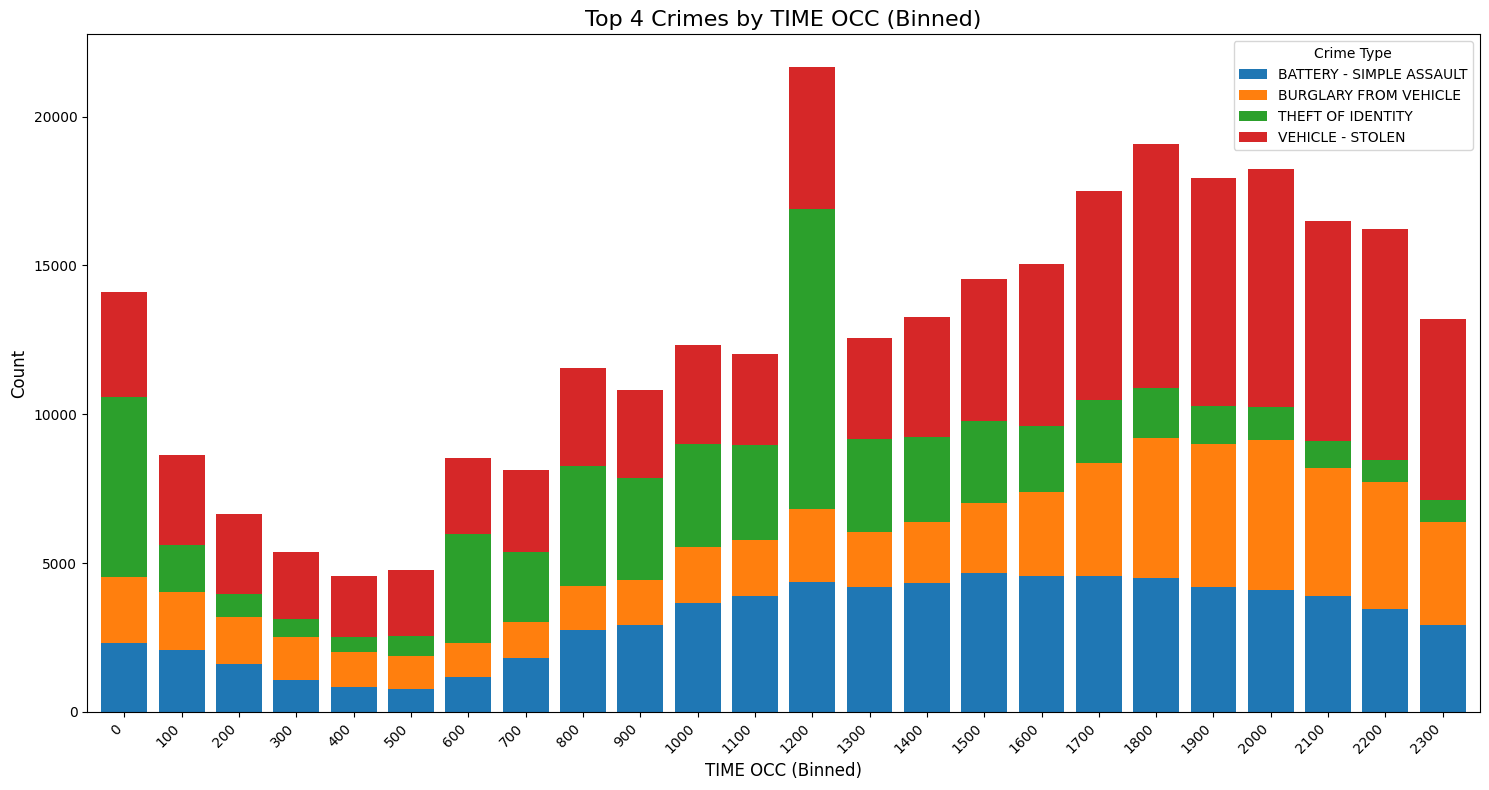

In [39]:
# prompt: a plot with top 4 crimes color coded stacked histogram with respect to grouped TIME OCC for every 100 in x axis and count on y axis

# Assuming 'pandas_df' is your Pandas DataFrame and it contains 'TIME OCC' and 'Crm Cd Desc' columns.
import matplotlib.pyplot as plt

# Group the data by 'TIME OCC' (binned) and 'Crm Cd Desc'
bin_width = 100
pandas_df['TIME OCC Bin'] = (pandas_df['TIME OCC'] // bin_width) * bin_width
top_4_crimes = pandas_df['Crm Cd Desc'].value_counts().nlargest(4).index
filtered_df = pandas_df[pandas_df['Crm Cd Desc'].isin(top_4_crimes)]
grouped_data = filtered_df.groupby(['TIME OCC Bin', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))
grouped_data.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Customize the plot
plt.title('Top 4 Crimes by TIME OCC (Binned)', fontsize=16)
plt.xlabel('TIME OCC (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', fontsize=10)
plt.tight_layout()
plt.show()

In [40]:
# Step 6: Check for missing values
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+-----+---------+--------+--------+----+---------+-----------+--------+------+-----------+-------+--------+--------+------------+---------+-----------+--------------+-----------+------+-----------+--------+--------+--------+--------+--------+------------+---+---+
|DR_NO|Date Rptd|DATE OCC|TIME OCC|AREA|AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|Crm Cd Desc|Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|Premis Desc|Weapon Used Cd|Weapon Desc|Status|Status Desc|Crm Cd 1|Crm Cd 2|Crm Cd 3|Crm Cd 4|LOCATION|Cross Street|LAT|LON|
+-----+---------+--------+--------+----+---------+-----------+--------+------+-----------+-------+--------+--------+------------+---------+-----------+--------------+-----------+------+-----------+--------+--------+--------+--------+--------+------------+---+---+
|    0|        0|       0|       0|   0|        0|          0|       0|     0|          0| 141520|       0|  134812|      134822|       14|        583|        645153|     645153|     1|          0|      11|  

In [41]:
# Step 10: Show transformed data
df.show()

+---------+--------------------+--------------------+--------+----+-----------+-----------+--------+------+--------------------+--------------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+--------+--------+--------+--------+--------------------+--------------------+-------+---------+
|    DR_NO|           Date Rptd|            DATE OCC|TIME OCC|AREA|  AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|         Crm Cd Desc|             Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|         Premis Desc|Weapon Used Cd|         Weapon Desc|Status| Status Desc|Crm Cd 1|Crm Cd 2|Crm Cd 3|Crm Cd 4|            LOCATION|        Cross Street|    LAT|      LON|
+---------+--------------------+--------------------+--------+----+-----------+-----------+--------+------+--------------------+--------------------+--------+--------+------------+---------+--------------------+--------------+--------------------+------+------------+-----

In [42]:
# prompt: drop dr_no, date rptd, date occ, area name, crm cd desc, mocodes, premis desc, weapon used cd , weapon ued desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, cross street

# Drop specified columns
columns_to_drop = ['Status Desc', 'LOCATION', 'DR_NO', 'Date Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
df = df.drop(*columns_to_drop)

# Step 10: Show transformed data
df.show()

+--------+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+
|TIME OCC|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Vict Sex|Vict Descent|Premis Cd|Status|    LAT|      LON|
+--------+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+
|    2130|   7|        784|       1|   510|       0|       M|           O|      101|    AA|34.0375|-118.3506|
|    1800|   1|        182|       1|   330|      47|       M|           O|      128|    IC|34.0444|-118.2628|
|    1700|   3|        356|       1|   480|      19|       X|           X|      502|    IC| 34.021|-118.3002|
|    2037|   9|        964|       1|   343|      19|       M|           O|      405|    IC|34.1576|-118.4387|
|    1200|   6|        666|       2|   354|      28|       M|           H|      102|    IC|34.0944|-118.3277|
|    2300|  18|       1826|       2|   354|      41|       M|           H|      501|    IC|33.9467|-118.2463|
|     900|

In [43]:
# prompt: add zeros in front of time occ so thal all the values are 4 digits

from pyspark.sql.functions import lpad

# Assuming 'Time Occ' column exists and contains time values as strings
df = df.withColumn("Time Occ", lpad(col("Time Occ"), 4, "0"))

# Step 10: Show transformed data
df.show()

+--------+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+
|Time Occ|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Vict Sex|Vict Descent|Premis Cd|Status|    LAT|      LON|
+--------+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+
|    2130|   7|        784|       1|   510|       0|       M|           O|      101|    AA|34.0375|-118.3506|
|    1800|   1|        182|       1|   330|      47|       M|           O|      128|    IC|34.0444|-118.2628|
|    1700|   3|        356|       1|   480|      19|       X|           X|      502|    IC| 34.021|-118.3002|
|    2037|   9|        964|       1|   343|      19|       M|           O|      405|    IC|34.1576|-118.4387|
|    1200|   6|        666|       2|   354|      28|       M|           H|      102|    IC|34.0944|-118.3277|
|    2300|  18|       1826|       2|   354|      41|       M|           H|      501|    IC|33.9467|-118.2463|
|    0900|

In [44]:
# prompt: make first 2 digits of time occ into a new column named hour and last two digits into minute

from pyspark.sql.functions import substring
from pyspark.sql.types import IntegerType


# Extract hour and minute from 'Time Occ'
df = df.withColumn("hour", substring(col("Time Occ"), 1, 2)) \
       .withColumn("minute", substring(col("Time Occ"), 3, 2))


df = df.withColumn("hour", col("hour").cast(IntegerType()))
df = df.withColumn("minute", col("minute").cast(IntegerType()))

df = df.drop("Time Occ")
# Step 10: Show transformed data
df.show()

+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+----+------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Vict Sex|Vict Descent|Premis Cd|Status|    LAT|      LON|hour|minute|
+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+----+------+
|   7|        784|       1|   510|       0|       M|           O|      101|    AA|34.0375|-118.3506|  21|    30|
|   1|        182|       1|   330|      47|       M|           O|      128|    IC|34.0444|-118.2628|  18|     0|
|   3|        356|       1|   480|      19|       X|           X|      502|    IC| 34.021|-118.3002|  17|     0|
|   9|        964|       1|   343|      19|       M|           O|      405|    IC|34.1576|-118.4387|  20|    37|
|   6|        666|       2|   354|      28|       M|           H|      102|    IC|34.0944|-118.3277|  12|     0|
|  18|       1826|       2|   354|      41|       M|           H|      501|    IC|33.9467|-118.2

In [45]:


# Binary encode 'Part 1-2'
from pyspark.sql.functions import when
df = df.withColumn("Part 1-2", when(col("Part 1-2") == "2", 1).otherwise(0))

# Step 10: Show transformed data
df.show()

+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+----+------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Vict Sex|Vict Descent|Premis Cd|Status|    LAT|      LON|hour|minute|
+----+-----------+--------+------+--------+--------+------------+---------+------+-------+---------+----+------+
|   7|        784|       0|   510|       0|       M|           O|      101|    AA|34.0375|-118.3506|  21|    30|
|   1|        182|       0|   330|      47|       M|           O|      128|    IC|34.0444|-118.2628|  18|     0|
|   3|        356|       0|   480|      19|       X|           X|      502|    IC| 34.021|-118.3002|  17|     0|
|   9|        964|       0|   343|      19|       M|           O|      405|    IC|34.1576|-118.4387|  20|    37|
|   6|        666|       1|   354|      28|       M|           H|      102|    IC|34.0944|-118.3277|  12|     0|
|  18|       1826|       1|   354|      41|       M|           H|      501|    IC|33.9467|-118.2

In [46]:
# prompt: one hot encode  Vict Sex, Vict Descent. dont create index. need different columns for different class

from pyspark.sql.functions import when

# One-hot encode 'Vict Sex'
vict_sex_columns = df.select("Vict Sex").distinct().rdd.flatMap(lambda x: x).collect()
for sex in vict_sex_columns:
    df = df.withColumn(f"Vict Sex_{sex}", when(col("Vict Sex") == sex, 1).otherwise(0))
df = df.drop("Vict Sex")

# One-hot encode 'Vict Descent'
vict_descent_columns = df.select("Vict Descent").distinct().rdd.flatMap(lambda x: x).collect()
for descent in vict_descent_columns:
    df = df.withColumn(f"Vict Descent_{descent}", when(col("Vict Descent") == descent, 1).otherwise(0))
df = df.drop("Vict Descent")

# Step 10: Show transformed data
df.show()

+----+-----------+--------+------+--------+---------+------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Premis Cd|Status|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict Descent_None|
+----+-----------+--------+------+--------+-

In [47]:
# prompt: one hot encode staus

# One-hot encode 'Status'
status_columns = df.select("Status").distinct().rdd.flatMap(lambda x: x).collect()
for status in status_columns:
    df = df.withColumn(f"Status_{status}", when(col("Status") == status, 1).otherwise(0))
df = df.drop("Status")

# Step 10: Show transformed data
df.show()

+----+-----------+--------+------+--------+---------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Premis Cd|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict 

In [48]:
# prompt: une inter quartile rang, impute outliers in vict age with mean

# Calculate quartiles for 'Vict Age'
quantiles = df.approxQuantile("Vict Age", [0.25, 0.75], 0.05)  # Adjust the relative error as needed
Q1 = quantiles[0]
Q3 = quantiles[1]
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the mean of 'Vict Age' (excluding outliers)
mean_vict_age = df.filter((df["Vict Age"] >= lower_bound) & (df["Vict Age"] <= upper_bound)).agg(mean("Vict Age")).collect()[0][0]

# Impute outliers with the mean
df = df.withColumn("Vict Age", when((col("Vict Age") < lower_bound) | (col("Vict Age") > upper_bound), mean_vict_age).otherwise(col("Vict Age")))

# Step 10: Show transformed data
df.show()

+----+-----------+--------+------+--------+---------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Premis Cd|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict 

In [49]:
df.show()

+----+-----------+--------+------+--------+---------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+
|AREA|Rpt Dist No|Part 1-2|Crm Cd|Vict Age|Premis Cd|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict 

In [50]:
# prompt: drop area, rpt dist no, crm cd and premis cd?

# Drop specified columns
columns_to_drop = ['AREA', 'Rpt Dist No', 'Crm Cd', 'Premis Cd']
df = df.drop(*columns_to_drop)

# Step 10: Show transformed data
df.show()

+--------+--------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+
|Part 1-2|Vict Age|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict Descent_None|Status_IC|Status_AA|Status_CC|Status_JO|Status_JA|Statu

In [51]:
# prompt: feature hash lat and lon

from pyspark.ml.feature import FeatureHasher

# Assuming 'LAT' and 'LON' columns exist in your DataFrame 'df'
hasher = FeatureHasher(inputCols=["LAT", "LON"], outputCol="hashed_location", numFeatures=10) # Adjust numFeatures as needed
df = hasher.transform(df)

# Step 10: Show transformed data
df.show()

+--------+--------+-------+---------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+--------------------+
|Part 1-2|Vict Age|    LAT|      LON|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict Descent_None|Status_IC|Status_AA|Status_CC|Stat

In [52]:
# prompt: drop lat lon

# Drop 'LAT' and 'LON' columns
df = df.drop("LAT", "LON")

# Step 10: Show transformed data
df.show()

+--------+--------+----+------+----------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+---------+---------+---------+---------+---------+---------+-----------+--------------------+
|Part 1-2|Vict Age|hour|minute|Vict Sex_F|Vict Sex_M|Vict Sex_X|Vict Sex_H|Vict Sex_-|Vict Sex_None|Vict Descent_K|Vict Descent_F|Vict Descent_B|Vict Descent_L|Vict Descent_V|Vict Descent_U|Vict Descent_O|Vict Descent_D|Vict Descent_C|Vict Descent_J|Vict Descent_Z|Vict Descent_A|Vict Descent_X|Vict Descent_W|Vict Descent_S|Vict Descent_G|Vict Descent_I|Vict Descent_P|Vict Descent_H|Vict Descent_-|Vict Descent_None|Status_IC|Status_AA|Status_CC|Status_JO|Status_JA|Status_AO|Status_Non

In [56]:
# prompt: remove negative values from vict age

# Remove rows where 'Vict Age' is negative
df = df.filter(df["Vict Age"] >= 0)

In [57]:
# prompt: number of rows in data

print(df.count())

970631


In [55]:
# prompt: linear ression to predict age using all the remaining variables

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=[col for col in df.columns if col != 'Vict Age'], outputCol="features")
df_assembled = assembler.transform(df)

# Split data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Vict Age")

# Train the model
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model (example: R-squared)
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Vict Age", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print(f"R-squared: {r2}")

# Show some predictions
predictions.select("features", "Vict Age", "prediction").show(10)

R-squared: 0.5226244054117233
+--------------------+--------+--------------------+
|            features|Vict Age|          prediction|
+--------------------+--------+--------------------+
|(47,[1,5,21,30,38...|    -3.0|   3.126542005946163|
|(47,[1,4,27,30,38...|    -2.0|  36.604938966670595|
|(47,[1,4,22,30,38...|    -2.0|    40.4185419497302|
|(47,[1,5,21,30,38...|    -1.0|   3.370669703058414|
|(47,[1,4,22,30,38...|    -1.0|  40.286819902681316|
|(47,[1,5,21,30,38...|    -1.0|    3.12654457115768|
|(47,[1,2,5,21,30,...|    -1.0|   2.670711907651167|
|(47,[1,2,5,21,31,...|    -1.0|-0.05446375488944044|
|(47,[2,35,38,45],...|     0.0|-0.40394341692867686|
|(47,[2,35,38,45],...|     0.0| -0.4211996505094828|
+--------------------+--------+--------------------+
only showing top 10 rows



In [58]:
# prompt: ML model to predict age using all the remaining variables

# Assuming 'Vict Age' is the target variable and all other columns are features.
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Random Forest Regressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="Vict Age", numTrees=100) # Adjust numTrees as needed

# Train the model
model = rf.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model (example: R-squared)
evaluator = RegressionEvaluator(labelCol="Vict Age", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print(f"R-squared (Random Forest): {r2}")

# Evaluate the model (example: RMSE)
evaluator_rmse = RegressionEvaluator(labelCol="Vict Age", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"RMSE (Random Forest): {rmse}")


# Show some predictions
predictions.select("features", "Vict Age", "prediction").show(10)

R-squared (Random Forest): 0.5135434966314645
RMSE (Random Forest): 15.148933967240936
+--------------------+--------+------------------+
|            features|Vict Age|        prediction|
+--------------------+--------+------------------+
|(47,[1,5,21,30,38...|    -3.0|1.8791437677350655|
|(47,[1,4,27,30,38...|    -2.0| 37.17785719316481|
|(47,[1,4,22,30,38...|    -2.0| 39.24508822127006|
|(47,[1,5,21,30,38...|    -1.0|2.4121990107183318|
|(47,[1,4,22,30,38...|    -1.0| 38.24304136687381|
|(47,[1,5,21,30,38...|    -1.0| 1.729545940274481|
|(47,[1,2,5,21,30,...|    -1.0|1.7109548351530273|
|(47,[1,2,5,21,31,...|    -1.0|1.6690715419177236|
|(47,[2,35,38,45],...|     0.0| 7.918051985789625|
|(47,[2,35,38,45],...|     0.0| 7.918051985789625|
+--------------------+--------+------------------+
only showing top 10 rows



In [62]:
from pyspark.sql.functions import udf, col, lit
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors, DenseVector
import numpy as np
from sklearn.neighbors import KNeighborsRegressor # Import scikit learn implementation

# Function to calculate Euclidean distance
def euclidean_distance(v1, v2):
    v1, v2 = Vectors.dense(v1), Vectors.dense(v2)
    return float(np.sqrt(v1.squared_distance(v2)))

# UDF for Euclidean distance
udf_euclidean_distance = udf(euclidean_distance, DoubleType())

def knn_regression(df, features_col, label_col, k=5):
    """
    Performs KNN regression on a PySpark DataFrame.
    """

    # Collect all data for KNN calculation (may not be efficient for large datasets)
    data = df.select(features_col, label_col).collect()

    # Create scikit-learn KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit([row[features_col].toArray() for row in data], [row[label_col] for row in data]) # Fit KNN using collected data


    # UDF for prediction
    def predict_udf(features):
        prediction = knn.predict([features.toArray()])[0]
        return float(prediction)

    predict_udf = udf(predict_udf, DoubleType())

    # Apply prediction UDF to DataFrame
    df_with_predictions = df.withColumn("prediction", predict_udf(col(features_col)))

    return df_with_predictions

# ... (Your previous code to create df_assembled, train_data, test_data) ...

# Apply KNN regression
predictions = knn_regression(test_data, "features", "Vict Age", k=5) # Tune K if needed

#Evaluate the model (R-squared)
evaluator_r2 = RegressionEvaluator(labelCol="Vict Age", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared (KNN): {r2}")

# Evaluate the model (RMSE)
evaluator_rmse = RegressionEvaluator(labelCol="Vict Age", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print(f"RMSE (KNN): {rmse}")

# Show predictions
predictions.select("features", "Vict Age", "prediction").show(10)

R-squared (KNN): 0.6378291309426246
RMSE (KNN): 13.071241038115522
+--------------------+--------+----------+
|            features|Vict Age|prediction|
+--------------------+--------+----------+
|(47,[1,5,21,30,38...|    -3.0|      -0.6|
|(47,[1,4,27,30,38...|    -2.0|      39.4|
|(47,[1,4,22,30,38...|    -2.0|      12.2|
|(47,[1,5,21,30,38...|    -1.0|      -0.2|
|(47,[1,4,22,30,38...|    -1.0|      41.2|
|(47,[1,5,21,30,38...|    -1.0|      -0.2|
|(47,[1,2,5,21,30,...|    -1.0|       8.4|
|(47,[1,2,5,21,31,...|    -1.0|      14.0|
|(47,[2,35,38,45],...|     0.0|       0.0|
|(47,[2,35,38,45],...|     0.0|       0.0|
+--------------------+--------+----------+
only showing top 10 rows

